In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [119]:
pca = PCA(15) 
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 15)


In [120]:
def plot_digits(data):
    fig, ax = plt.subplots(6, 8, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

### Part 2

In [121]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import load_digits
digits = load_digits()
data=digits.data
digits.data.shape

(1797, 64)

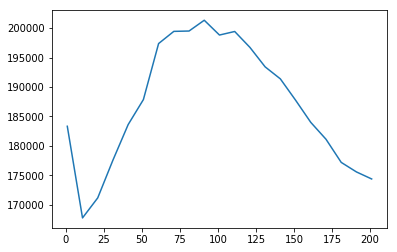

In [122]:
n_components = np.arange(1, 210,10)
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
bics = [model.fit(projected).bic(projected) for model in models]
plt.plot(n_components, bics);

In [123]:
gmm = GMM(10, covariance_type='full', random_state=0)
gmm.fit(projected)
print(gmm.converged_)

True


In [124]:
data_new,y = gmm.sample(48)
print(data_new.shape)

(48, 15)


(48, 64)


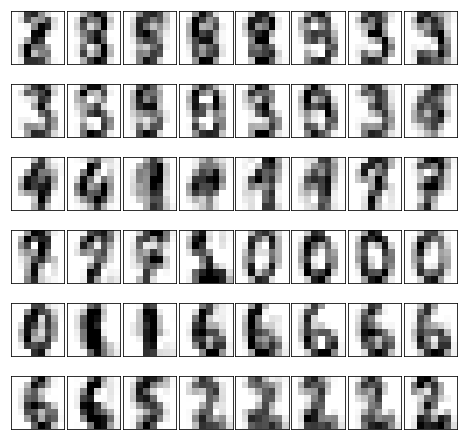

In [125]:
pca.inverse_transform(data_new)
print(digits_new.shape)
plot_digits(digits_new)

### with 20 dimensions

In [138]:
pca = PCA(20) 
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 20)


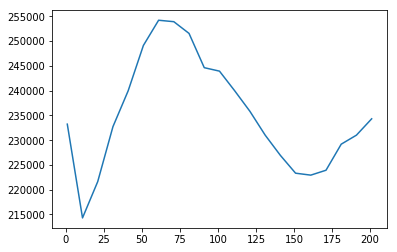

In [139]:
n_components = np.arange(1, 210,10)
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
bics = [model.fit(projected).bic(projected) for model in models]
plt.plot(n_components, bics);

In [140]:
gmm = GMM(10, covariance_type='full', random_state=0)
gmm.fit(projected)
print(gmm.converged_)

True


In [141]:
data_new,y = gmm.sample(48)
print(data_new.shape)

(48, 20)


(48, 64)


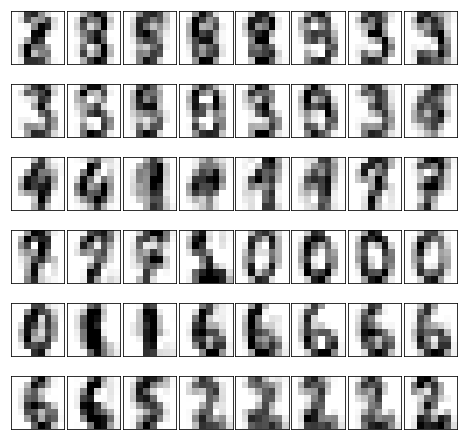

In [142]:
pca.inverse_transform(data_new)
print(digits_new.shape)
plot_digits(digits_new)

### With 35 Dimensions

In [143]:
pca = PCA(35) 
projected = pca.fit_transform(digits.data)
print(projected.shape)

(1797, 35)


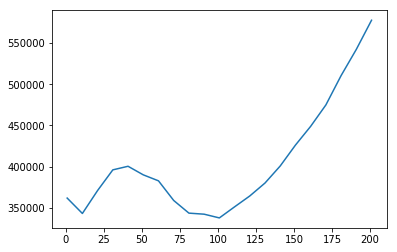

In [144]:
n_components = np.arange(1, 210,10)
models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
bics = [model.fit(projected).bic(projected) for model in models]
plt.plot(n_components, bics);

In [145]:
gmm = GMM(100, covariance_type='full', random_state=0)
gmm.fit(projected)
print(gmm.converged_)

True


In [146]:
data_new,y = gmm.sample(48)
print(data_new.shape)

(48, 35)


(48, 64)


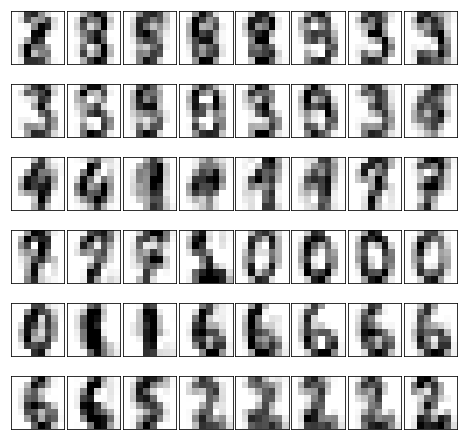

In [147]:
pca.inverse_transform(data_new)
print(digits_new.shape)
plot_digits(digits_new)

## Part 1: Kernel Density estimation

In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


### With 15 dimensions

In [155]:
digits = load_digits()
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)


In [156]:
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(data)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bandwidth': array([ 0.1    ,  0.12743,  0.16238,  0.20691,  0.26367,  0.33598,
        0.42813,  0.54556,  0.69519,  0.88587,  1.12884,  1.43845,
        1.83298,  2.33572,  2.97635,  3.79269,  4.83293,  6.15848,
        7.8476 , 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [157]:
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 3.79269019073225


In [158]:
kde = grid.best_estimator_


In [159]:
# sample 48 new points from the data
new_data = kde.sample(48, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x12 grid
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

Text(0.5, 1.0, '"New" digits drawn from the kernel density model')

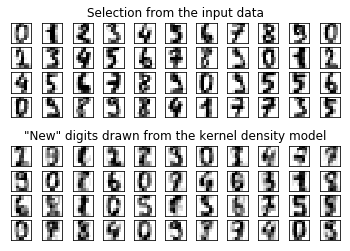

In [160]:
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')


### KDE and GMM estimation with 20 dimensions

In [152]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [161]:
pca = PCA(20) 
data = pca.fit_transform(digits.data)
print(data.shape)

(1797, 20)


In [162]:
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(data)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bandwidth': array([ 0.1    ,  0.12743,  0.16238,  0.20691,  0.26367,  0.33598,
        0.42813,  0.54556,  0.69519,  0.88587,  1.12884,  1.43845,
        1.83298,  2.33572,  2.97635,  3.79269,  4.83293,  6.15848,
        7.8476 , 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [163]:
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 3.79269019073225


In [166]:
kde = grid.best_estimator_

In [167]:
# sample 48 new points from the data
new_data = kde.sample(48, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x12 grid
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

Text(0.5, 1.0, '"New" digits drawn from the kernel density model')

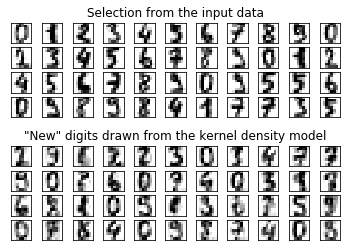

In [168]:
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')
